# Model comparison PEB - Experiment 2 - Perceptual Decision
# Group level analysis

In [1]:
import pandas as pd
import numpy as np
import os.path
import numpy
import statistics 

import numpy as np
import pandas as pd
from pandas.core.frame import DataFrame as DF
import seaborn as sns

sns.set(color_codes=True)
#np.random.seed(sum(map(ord, "distributions")))
from sklearn import linear_model  # packages for the logistic regression function to plot the logistic regression 
from sklearn.linear_model import LogisticRegression # packages for the logistic regression function to plot the logistic regression 
import scipy
from scipy import stats, integrate
from scipy.stats import mode
from scipy.stats.stats import pearsonr # Pearson's correlation
from copy import copy as copy
import operator as operator
import pylab

# Plotting tools
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
from matplotlib.ticker import FuncFormatter
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%pylab inline
figsize(5, 5)

import glob
import os

Populating the interactive namespace from numpy and matplotlib


/Users/pradyumna/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['pylab', 'copy']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
#def ttestsPlot(data1, data2,c1 ='#4F6A9A',c2 = '#AC5255',lab1 = "Like", lab2 = "Dislike",title = ''):
#
#    # t-TEST
#    diff = mean(data1) - mean(data2)
#    [s, p] = stats.ttest_rel(data1,data2)
#    print ("data1 = "+ str(mean(data1))+ "; data2 = "+ str(mean(data2))+"; [data1 - data2] =  " + str(diff) +"; t =  " + str(round(s,2)) + " ; p-value =" + str(p) )
#    
#        
#    # PLOT LIKE AND DISLIKE VARIABILITY
#        
#    # Set seaborn style for the plot
#    fig = plt.figure(figsize=[6,10])
#    sns.set(style='white',font_scale=1.5)
#    jittr = np.random.uniform(low=-0.3,high=0.3,size=len(data1))    
#    plt.scatter([1]*len(data1)+jittr, data1, c= c1, alpha=0.7,label=lab1,hatch='//')
#    plt.scatter([2]*len(data2)+jittr, data2, c= c2, alpha=0.7,label=lab2)
#    
#    ## add lines between slope points in like and dislike for each participant
#    count = 0
#    for i in range(len(data1)):
#        plt.plot( [1 + jittr[i],2 + jittr[i]], [ data1[i] , data2[i]],'--', lw=1.0, color = 'black', alpha = 0.2)
#        if data1[i] < data2[i]:
#            print ("Participants with InvFull > Full: " + str(i) + '. Difference : ' + str(data1[i] - data2[i]))
#            count+=1
#    print ("Total number of participants with lower WAIC for " + lab1+ ' : ' + str(count))
#        
#    #legend(loc = 'best')
#    plt.xticks([1, 2,], [lab1, lab2],fontsize=18)
#    plt.ylabel(title, fontsize=18)
#    sns.despine()

-------------------------

# 1. Model comparison - WAIC scores


In [3]:
#waic_exp2_2ndChoice_gaze_free = np.load(str('Results/Waic/glam_CP2020_indiv_GazeBias_exp2_2ndChoice_Free.npy'))
#waic_exp2_2ndChoice_gaze_fix = np.load(str('Results/Waic/glam_CP2020_indiv_GazeBias_exp2_2ndChoice_Fixed.npy'))

#waic_exp2_2ndChoice_free = np.load(str('Results/Waic/glam_CP2020_indiv_noBias_exp2_2ndChoice_Free.npy'))
#waic_exp2_2ndChoice_fix = np.load(str('Results/Waic/glam_CP2020_indiv_noBias_exp2_2ndChoice_Fixed.npy'))

In [4]:

# waic scores Model Basic , Model Null , Heuristic (including Inverse for the negative frame)
# Waic Order
# Model Basic
# Model Null
# Model Heuristic (Inverted evidence for dislike frame)
# Model Heuristic Non-Inverted (only dislike)

waic_scores_1 = [-529606.38,
-533985.37,
-1260031.2] # most frame

waic_scores_2 = [-484939.5,
-528689.88,
-1548111.58]# few frame
#-1088540.93] # no inverted waic score for few heuristic model


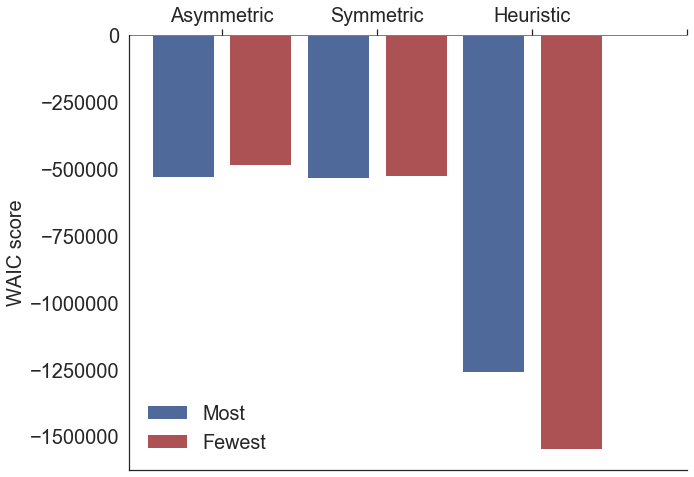

In [6]:
ysize = 20
ticksize = 20
nticks = 7

fig, ax = plt.subplots(1,1,figsize=(10,8))
sns.set(style='white', font_scale=1.8)

ax.set_facecolor('xkcd:white')
width_bars = 0.4
bars1 = plt.bar(np.add(range(len(waic_scores_1)),-0.25), waic_scores_1, color='#4F6A9A',width = width_bars, hatch = '')
bars2 = plt.bar(np.add(range(len(waic_scores_2)),+0.25), waic_scores_2, color='#AC5255',width = width_bars, hatch = '')

patterns = ('', '')

#plt.xticks(x, ('', 'Frame-Value', 'Preference-Value'))
#plt.ylim(15000,18000)
plt.ylabel('WAIC score',fontsize = ysize )

patch_1 = mpatches.Patch(facecolor='#4F6A9A',hatch=r'', label='Most')
patch_2 = mpatches.Patch(facecolor='#AC5255',hatch=r'', label='Fewest')

leg = plt.legend(handles=[patch_1,patch_2] )
leg.get_frame().set_facecolor('none')
leg.get_frame().set_linewidth(0.0)

#for bar, pattern in zip(bars, patterns):
#    bar.set_hatch(pattern)

#for i in range(len(Models_WAIC)):
#    position_parts= np.full(len(Models_WAIC_part[i]),i, dtype=int)
#    jittr = np.random.uniform(low=-0.2,high=0.2,size=len(Models_WAIC_part[i]))/2
#    ax.plot(position_parts+jittr, Models_WAIC_part[i], marker='o', ms=8, color='#000000',alpha=0.3,linestyle="None")

    
# Turn off tick labels
plt.xticks([0,1,2,3],['Asymmetric','Symmetric','Heuristic'])
plt.axhline(0, color='black', lw=2, alpha=0.5)
plt.yticks(fontsize=ticksize)
ax.yaxis.set_major_locator(plt.MaxNLocator(nticks))
ax.xaxis.tick_top()
#plt.tick_params( axis='x', which='both',bottom=False,top=False,labelbottom=False) 
#plt.xticks([],[])

sns.despine()

plt.show()

#fig.savefig(str('SavedFigures/WAIC_ModelComparison_like.png'), dpi = 200 )

In [7]:

# waic scores Model Basic , Model Null , Heuristic (including Inverse for the negative frame)
# Waic Order
# Model Basic
# Model Null
# Model Heuristic (Inverted evidence for dislike frame)
# Model Heuristic Non-Inverted (only dislike)

waic_scores_1 = [-529606.38,
-1260031.2] # most frame

waic_scores_2 = [-484939.5,
-1548111.58]# few frame
#-1088540.93] # no inverted waic score for few heuristic model


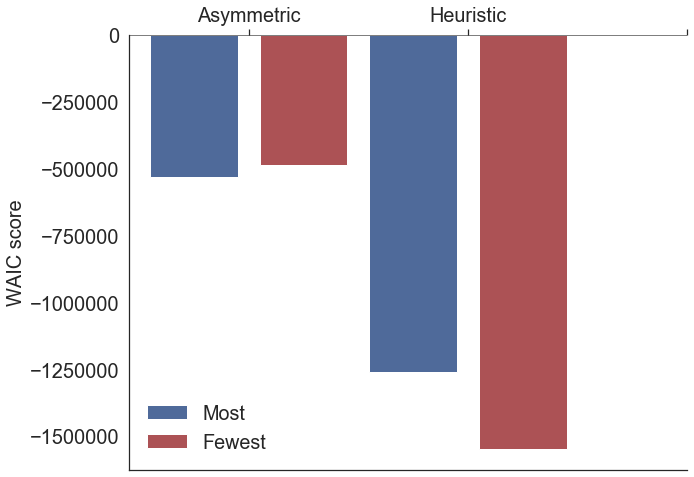

In [9]:
ysize = 20
ticksize = 20
nticks = 7

fig, ax = plt.subplots(1,1,figsize=(10,8))
sns.set(style='white', font_scale=1.8)

ax.set_facecolor('xkcd:white')
width_bars = 0.4
bars1 = plt.bar(np.add(range(len(waic_scores_1)),-0.25), waic_scores_1, color='#4F6A9A',width = width_bars, hatch = '')
bars2 = plt.bar(np.add(range(len(waic_scores_2)),+0.25), waic_scores_2, color='#AC5255',width = width_bars, hatch = '')

patterns = ('', '')

#plt.xticks(x, ('', 'Frame-Value', 'Preference-Value'))
#plt.ylim(15000,18000)
plt.ylabel('WAIC score',fontsize = ysize )

patch_1 = mpatches.Patch(facecolor='#4F6A9A',hatch=r'', label='Most')
patch_2 = mpatches.Patch(facecolor='#AC5255',hatch=r'', label='Fewest')

leg = plt.legend(handles=[patch_1,patch_2] )
leg.get_frame().set_facecolor('none')
leg.get_frame().set_linewidth(0.0)

#for bar, pattern in zip(bars, patterns):
#    bar.set_hatch(pattern)

#for i in range(len(Models_WAIC)):
#    position_parts= np.full(len(Models_WAIC_part[i]),i, dtype=int)
#    jittr = np.random.uniform(low=-0.2,high=0.2,size=len(Models_WAIC_part[i]))/2
#    ax.plot(position_parts+jittr, Models_WAIC_part[i], marker='o', ms=8, color='#000000',alpha=0.3,linestyle="None")

    
# Turn off tick labels
plt.xticks([0,1,2],['Asymmetric','Heuristic'])
plt.axhline(0, color='black', lw=2, alpha=0.5)
plt.yticks(fontsize=ticksize)
ax.yaxis.set_major_locator(plt.MaxNLocator(nticks))
ax.xaxis.tick_top()
#plt.tick_params( axis='x', which='both',bottom=False,top=False,labelbottom=False) 
#plt.xticks([],[])

sns.despine()

plt.show()

#fig.savefig(str('SavedFigures/WAIC_ModelComparison_like.png'), dpi = 200 )

------------------

 # ---[END]----